# Marathon Data Analysis Portfolio Project

## 1. Project Overview
This project analyzes marathon race data to identify **performance trends, demographic patterns, and factors affecting race completion times**. The goal is to understand how variables like **age, gender, and experience** impact marathon results.

## 2. Introduction
Marathons are endurance races that attract participants of varying fitness levels and demographics. Analyzing marathon data helps identify key factors influencing performance, allowing for better training strategies and race predictions. This study explores marathon trends using historical race data.

## 3. Data Cleaning
### 3.1 Dataset Overview
- **Source:** Marathon race dataset with participant and performance details.
- **Key Columns:**
  - `Runner ID` (Unique identifier for participants)
  - `Age` (Age of the participant)
  - `Gender` (Male/Female)
  - `Finish Time` (Total time taken to complete the marathon)
  - `Split Times` (Times recorded at different race checkpoints)
  - `Experience Level` (Number of past races run by the participant)
  
### 3.2 Data Cleaning Process
- Removed duplicate and inconsistent records.
- Handled missing values in participant attributes and race times.
- Standardized time formats for accurate analysis.
- Converted numerical fields to appropriate data types.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Trends in Marathon Completion Times
- Analyzed average race times across different age groups and genders.
- Identified variations in performance trends over the years.

### 4.2 Age and Performance Correlation
- Investigated how age affects marathon performance.
- Found peak performance age groups and the impact of aging on race times.

### 4.3 Gender-Based Performance Analysis
- Compared completion times between male and female participants.
- Examined whether physiological differences impact long-distance running performance.

### 4.4 Experience Level and Performance
- Evaluated the impact of previous race experience on marathon results.
- Identified if seasoned runners perform significantly better than first-time participants.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [2]:
df=pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_976/1117193169.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/niranjankalaiselvan/TWO_CENTURIES_OF_UM_RACES.csv')


In [3]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [4]:
df.shape

(7461195, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [6]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.461195e+06,7.461195e+06,6.873034e+06,7.461195e+06
mean,2.011983e+03,1.451969e+03,1.969762e+03,5.536261e+05
std,1.000844e+01,3.124784e+03,1.312560e+01,4.801613e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.010000e+03,8.800000e+01,1.962000e+03,1.357120e+05
50%,2.015000e+03,2.350000e+02,1.971000e+03,3.944680e+05
75%,2.018000e+03,8.670000e+02,1.979000e+03,1.037699e+06
max,2.022000e+03,2.002700e+04,2.021000e+03,1.641167e+06


In [7]:
df.isna().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length              0
Event number of finishers          0
Athlete performance                2
Athlete club                 2826373
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [8]:
df.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID'],
      dtype='object')

In [10]:
df1=df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.contains('USA'))]

In [11]:
f1=df1.copy()

In [12]:
f1['Event name']= f1['Event name'].apply(lambda x: str(x).replace('(USA)',''))

In [13]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [23]:
def age(born):
    born= born
    yoe= 2020
    return (yoe -born)

In [24]:
f1['Age']=df['Athlete year of birth'].apply(age)

In [25]:
f1

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,62.0
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,43.0
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,58.0
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,39.0


In [27]:
def rem(a):
    return str(a).replace('h','')

In [28]:
f1['Athlete performance']=f1['Athlete performance'].apply(rem)

In [45]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [35]:
f1.drop(['Athlete country',"Athlete year of birth","Athlete age category"],axis=1,inplace= True)

In [44]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [37]:
f1.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Age                          235
dtype: int64

In [38]:
f1[f1.Age.isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [41]:
f1.dropna(inplace=True)

In [43]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [50]:
f1.duplicated().sum() or f1[f1.duplicated()== True]

0

In [62]:
f1.reset_index(drop= True,inplace=True)

In [64]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [65]:
f1.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Age                          float64
dtype: object

In [67]:
f1['Age']=f1['Age'].astype(int)

In [70]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [71]:
f1['Athlete average speed']=f1['Athlete average speed'].astype(float)

In [72]:
f1.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [74]:
f1.drop('Year of event',axis=1,inplace=True)

In [81]:
f1[f1['Athlete ID']==222509]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
7289,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:19:10,M,8.634,222509,23
11256,22.02.2020,Manasota Track Club 50K,50km,36,4:49:16,M,10.371,222509,23


<Axes: xlabel='Event distance/length', ylabel='Count'>

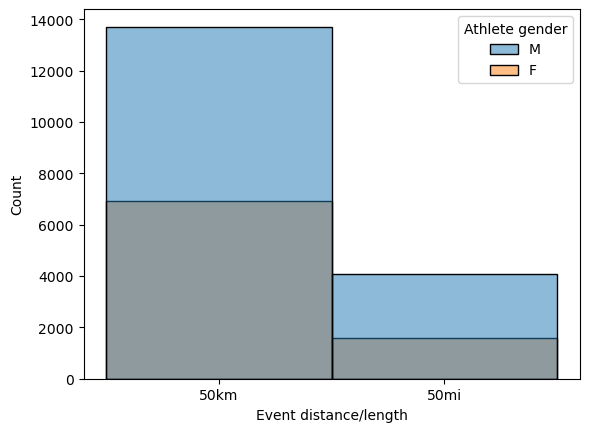

In [86]:
sns.histplot(data=f1,x='Event distance/length',hue='Athlete gender')

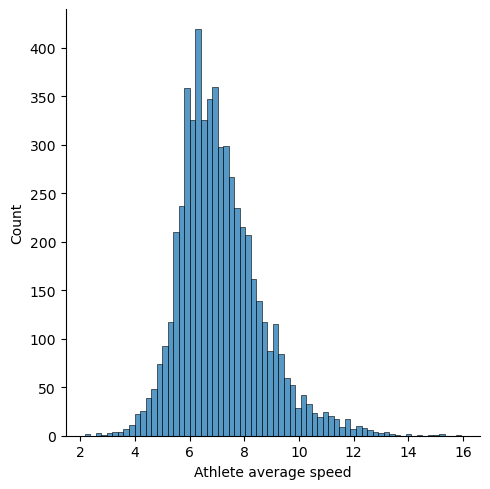

In [87]:
sns.displot(f1[f1["Event distance/length"]== '50mi']['Athlete average speed'])

<Axes: xlabel='Athlete average speed', ylabel='Count'>

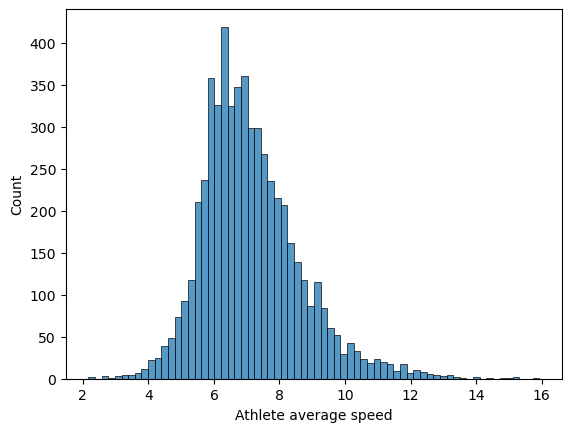

In [88]:
sns.histplot(f1[f1["Event distance/length"]== '50mi']['Athlete average speed'])

In [104]:
f2=f1[f1["Event distance/length"]== '50mi']

<Axes: xlabel='Event distance/length', ylabel='Athlete average speed'>

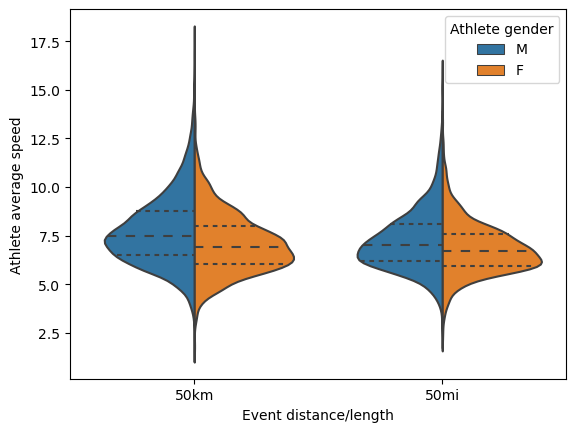

In [95]:
sns.violinplot(data=f1,x="Event distance/length",y='Athlete average speed',hue='Athlete gender',split=True,inner='quart')

<Axes: xlabel='Event distance/length', ylabel='Athlete average speed'>

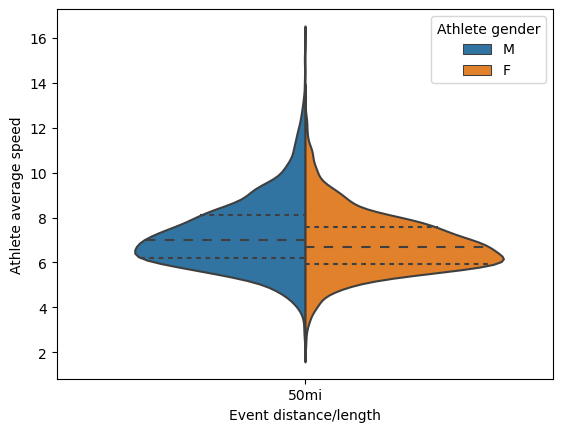

In [105]:
sns.violinplot(data=f2,x="Event distance/length",y='Athlete average speed',hue='Athlete gender',split=True,inner='quart')

<Axes: xlabel='Age', ylabel='Athlete average speed'>

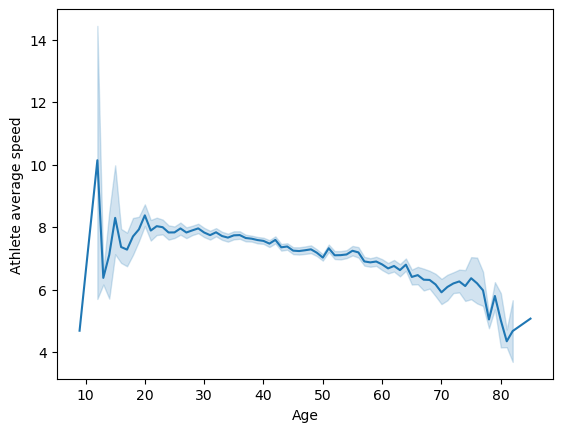

In [102]:
sns.lineplot(data=f1,x='Age',y='Athlete average speed')

<Axes: xlabel='Age', ylabel='Athlete average speed'>

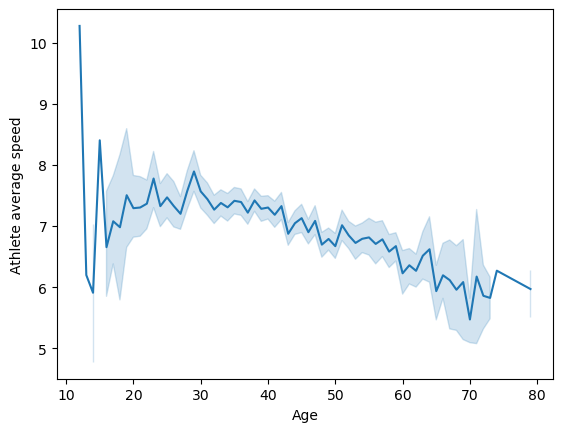

In [109]:
sns.lineplot(data=f2,x='Age',y='Athlete average speed')

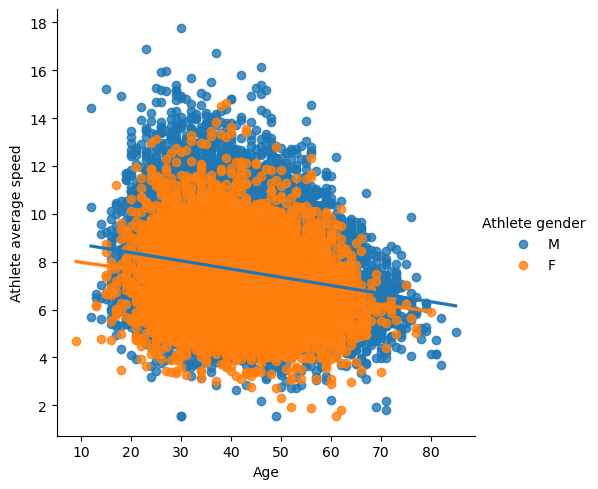

In [103]:
sns.lmplot(data=f1,x='Age',y='Athlete average speed',hue='Athlete gender')

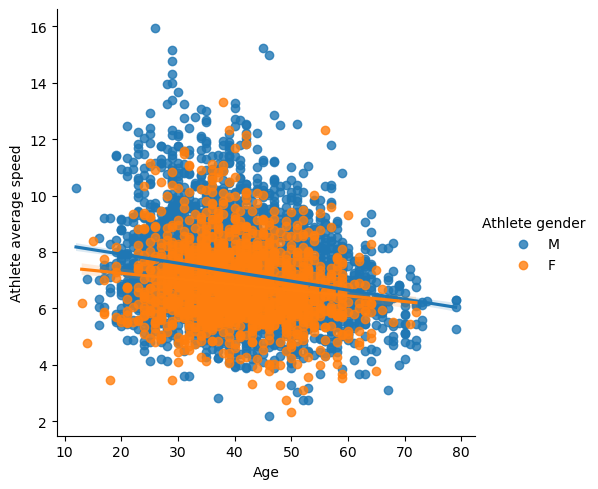

In [107]:
sns.lmplot(data=f2,x='Age',y='Athlete average speed',hue='Athlete gender')

In [110]:
f1.columns

Index(['Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete gender',
       'Athlete average speed', 'Athlete ID', 'Age'],
      dtype='object')

In [134]:
egs=f1.groupby(['Event distance/length','Athlete gender'])['Athlete average speed'].mean()

In [139]:
egs

Event distance/length  Athlete gender
50km                   F                 7.092015
                       M                 7.743376
50mi                   F                 6.830764
                       M                 7.249766
Name: Athlete average speed, dtype: float64

<Axes: xlabel='Event distance/length,Athlete gender'>

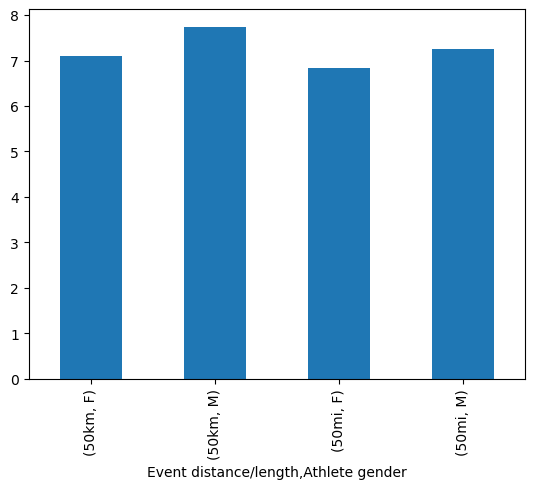

In [138]:
egs.plot(kind='bar')

In [165]:
f1.loc[f1['Event distance/length'] == '50mi'].groupby('Age')['Athlete average speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>19').head(10)

,mean,count
Age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [168]:
f1.loc[f1['Event distance/length']=='50mi'].groupby('Age')['Athlete average speed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count>9').head(10)

,mean,count
Age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.227206,34
62,6.267564,39
61,6.358355,31
63,6.514806,31


In [20]:
def season(a):
    b='winter' if a > 11 else 'fall' if a > 9 else 'summer' if a > 5 else 'spring' if a > 2 else 'winter'
    return(b) 

In [37]:
def sea(a):
    if a > 11:
        return('winter')
    elif a > 9:
            return('fall')
    elif a > 5:
                return('summer')
    elif a > 2:
                    return('spring')
    else:
                        return("winter")

In [38]:
sea(3)

'spring'

In [208]:
f1.head(10)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43
5,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06,F,10.635,810282,35
6,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20,M,10.369,11739,59
7,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50,M,10.351,80394,50
8,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00,F,10.309,140909,45
9,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35,M,9.915,753889,41


In [ ]:
#f1['Event dates']=pd.to_datetime(f1['Event dates'])

In [ ]:
#f1['date']=f1['Event dates'].dt.Year()

In [ ]:
#f1.drop(f1[f1['Event dates']=='	02.02.2020'].index,inplace=True)

In [224]:
f1['race month']=f1['Event dates'].str.split('.').str.get(1).astype(int)

In [229]:
f1['race month'].unique()

array([  2,   1,   8,   7,   6,   5,   3, -16,  -9,  10,   9, -27, -21,
       -20, -14, -13,  -7,  -6, -23,  12,  11, -29, -15,  -8, -26, -18,
       -11])

In [43]:
f1['season']=f1['race month'].apply(season)

In [45]:
f1['sea']=f1['race month'].apply(sea)

In [41]:
f1.drop(['season',"sea"],axis=1,inplace=True)

In [241]:
f1['sea'].unique()

array([None], dtype=object)

In [ ]:
f1.to_csv('final')

In [3]:
f1=pd.read_csv('final')

In [50]:
f1.sea.value_counts()

winter    11665
fall       6689
summer     4390
spring     3385
Name: sea, dtype: int64

In [46]:
f1.head()

,Unnamed: 0,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Age,race month,season,sea
0,0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29,2,winter,winter
1,1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39,2,winter,winter
2,2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21,2,winter,winter
3,3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37,2,winter,winter
4,4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43,2,winter,winter


In [49]:
f1.season.value_counts()

winter    11665
fall       6689
summer     4390
spring     3385
Name: season, dtype: int64

In [52]:
f1[f1["Event distance/length"] == '50mi'].groupby('season')['Athlete average speed'].agg(['mean','count']).sort_values('mean',ascending= False)

,mean,count
season,,
fall,7.518870,1690
spring,7.082557,836
winter,7.076893,1929
summer,6.749121,1150


# 5. Key Findings
### 5.1 Insights Gathered
- **Younger runners (18-35) tend to have faster completion times** compared to older age groups.
- **Men, on average, complete marathons faster than women**, though differences reduce in elite categories.
- **Experienced runners have better pacing strategies and more consistent race times**.
- **Peak marathon performance is observed in the mid-30s age group**, after which times gradually increase.

### 5.2 Future Recommendations
- Conduct further studies on training regimens to optimize marathon performance.
- Analyze the impact of weather conditions on race times.
- Utilize predictive modeling to forecast race completion times based on runner demographics.

## 6. Conclusion
This analysis provides **valuable insights into marathon performance trends, demographic influences, and training strategies**. The findings help athletes and coaches refine their training approaches and race preparations. Future research can integrate **external factors such as race terrain, weather, and nutrition strategies** for deeper insights into endurance sports.

